# Analysis

In [100]:
# import libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from scipy.stats import pearsonr, chi2_contingency
import numpy as np

In [18]:
# load the dataset
insurance = pd.read_csv("insurance.csv")

# inspect the first few rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# unique values of region
print(insurance.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [101]:
# unique values for children
print(insurance.children.unique())

[0 1 3 2 5 4]


In [21]:
# get more detail about the insurance
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
# get the data types of insurance
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
# view the names of the columns
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
# get a statistical summary of the insurance
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [25]:
# check for missing data
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# create empty lists for the various attributes of insurance
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [27]:
# build a function to make loading data into the respective lists efficient as possible
def load_list_data(lst, csv_file, column_name):
    with open('insurance.csv', newline='') as insurance_info:
        insurance_reader = csv.DictReader(insurance_info)
        for row in insurance_reader:
            lst.append(row[column_name])
        return lst    

In [28]:
# Load data into the respective lists
load_list_data(ages, 'insurance.csv', 'age')
load_list_data(sexes, 'insurance.csv', 'sex')
load_list_data(bmis, 'insurance.csv', 'bmi')
load_list_data(num_children, 'insurance.csv', 'children')
load_list_data(smoker_statuses, 'insurance.csv', 'smoker')
load_list_data(regions, 'insurance.csv', 'region')
load_list_data(insurance_charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

In [103]:
# build a function that calculates the average age of the patients
def analyze_ages():
    # initialize total age at zero 
    total_age = 0
    # iterate through all ages in the ages list
    for age in ages:
        # sum of the total age
        total_age += int(age)
    # return total age divided by the length of the patient list    
    return ("Average patient age: " + str(round(total_age/len(ages), 2)) + " years old.")
print(analyze_ages())

Average patient age: 39.21 years old.


In [104]:
# build a function that calculates the number of males and females
def analyze_sexes():
    # initialize the number of males and females to zero 
    females = 0
    males = 0
    # iterate through each sex in the sexes list
    for sex in sexes:
        # if female add to female variable 
        if sex == 'female':
            females += 1
        # if male add to male variable    
        elif sex == 'male':
            males += 1
    # print out the number of each 
    print("Count for female: " + str(females))
    print("Count for male: " + str(males)) 
analyze_sexes()

# save the count in variables
females_count = 662
males_count = 676

Count for female: 662
Count for male: 676


In [32]:
# convert the count for males and females in "percentage"
females_percentage = round((females_count / len(sexes)) * 100, 2)
males_percentage = round((males_count / len(sexes)) * 100, 2)
# print out the percentage and count of each
print("The population of this dataset consists of " + str(females_count) + " females which is " +
      str(females_percentage) + "% and " + str(males_count) + " males which is " + str(males_percentage) + "%.")

The population of this dataset consists of 662 females which is 49.48% and 676 males which is 50.52%.


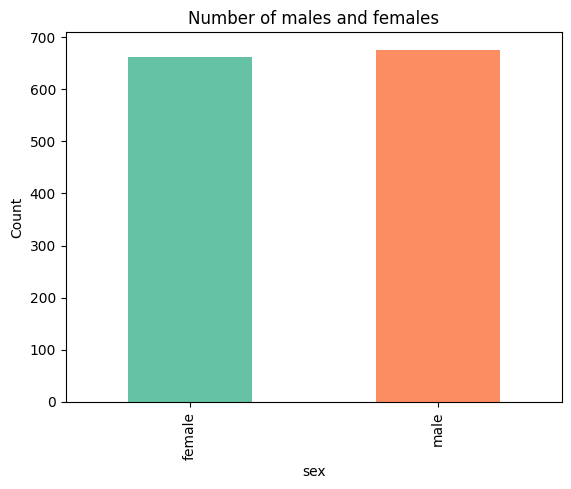

In [132]:
# Plot the number of males and females
# group the data by "sex" and count the observations in each group
counts = insurance.groupby("sex").size()

# define a color palette
colors = sns.color_palette("Set2")

# create a bar chart of the counts
counts.plot(kind="bar", color=colors)

# save figure
plt.savefig('males_females.png')

# add axis labels and a title
plt.ylabel("Count")
plt.title("Number of males and females")

# show the chart
plt.show()

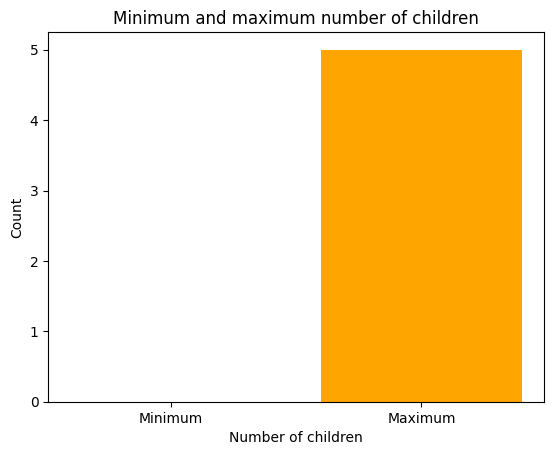

In [133]:
# plot the minimum and maximum amount of "children"
# calculate the minimum and maximum number of children
min_children = insurance["children"].min()
max_children = insurance["children"].max()

# create a bar chart of the minimum and maximum values
plt.bar(["Minimum", "Maximum"], [min_children, max_children], color='orange')

# save figure
plt.savefig('max_min_children.png')

# add axis labels and a title
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.title("Minimum and maximum number of children")

# show the chart
plt.show()

In [110]:
# calculate the total amount of children
total_children = 0
for kid in num_children:
    total_children += int(kid)
    
# print total_children
print("The total amount of children is: " + str(total_children))
    
# find the average number of children per subject
average_num_of_children = round(total_children / len(num_children), 2)
print("The average number of children per subject is " + str(average_num_of_children) + ".")

The total amount of children is: 1465
The average number of children per subject is 1.09.


In [116]:
# build a function that makes a distribution of the number of children
def kids_distribution(num_children):
    # initialize counters for each category of number of children
    no_kids = 0
    one_kid = 0
    two_kids = 0
    three_kids = 0
    four_kids = 0
    five_kids = 0
    
    # iterate over each input value in the list of number of children
    for kid in num_children:
        # update the appropriate counter based on the number of children
        if kid == '0':
            no_kids += 1
        elif kid == '1':
            one_kid += 1
        elif kid == '2':
            two_kids += 1
        elif kid == '3':
            three_kids += 1
        elif kid == '4':
            four_kids += 1
        elif kid == '5':
            five_kids += 1
            
    # print out the results, including the percentage of each category
    print("No kids: " + str(no_kids) + " (" + str(round(no_kids / len(num_children)*100, 1)) + "%), " + "one kid: " + str(one_kid)
         + " (" + str(round(one_kid / len(num_children)*100, 1)) + "%)," + " Two kids: " + str(two_kids) +
          " (" + str(round(two_kids / len(num_children)*100, 1)) + "%)," + " Three kids: " + str(three_kids) + 
         " (" + str(round(three_kids / len(num_children)*100, 1)) + "%)," + " Four kids: " + str(four_kids) +
         " (" + str(round(four_kids / len(num_children)*100, 1)) + "%), "  + " Five kids: " + str(five_kids) + 
         " (" + str(round(five_kids / len(num_children)*100, 1)) + "%).")


# call the function kids_distribution with the list num_children
kids_distribution(num_children)

No kids: 574 (42.9%), one kid: 324 (24.2%), Two kids: 240 (17.9%), Three kids: 157 (11.7%), Four kids: 25 (1.9%),  Five kids: 18 (1.3%).


In [117]:
# build a function to find the average yearly medical charges for patients
def average_charges():
    # initialize total_charges variable to zero
    total_charges = 0
    # iterate through charges in patients charges list 
    # add each charge to total_charges
    for charge in insurance_charges:
        total_charges += float(charge)
    # return the average charges rounded to the hundredths place  
    return ("Average yearly medical insurance charge: " + 
            str(round(total_charges/len(insurance_charges), 2)) + " dollars.")
print(average_charges())

Average yearly medical insurance charge: 13270.42 dollars.


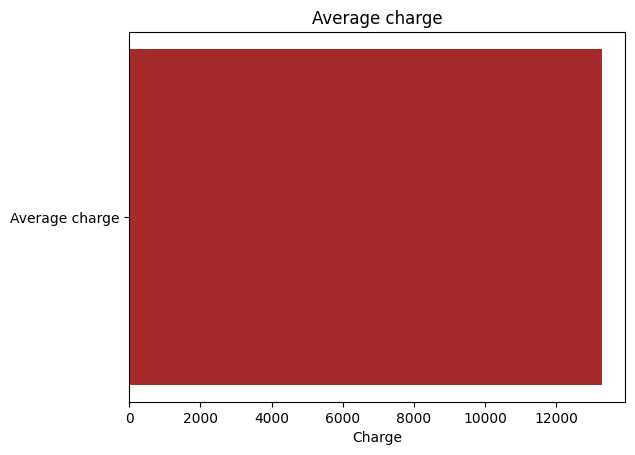

In [118]:
# plot the average value of the "charge" variable
avg_charge = insurance["charges"].mean()

# create a horizontal bar chart of the average value
plt.barh(["Average charge"], [avg_charge], color='brown')

# add axis labels and a title
plt.xlabel("Charge")
plt.title("Average charge")

# show the chart
plt.show()

In [125]:
# check if exist a relationship between the variables "sex" and "smoker" 
# create a cross tabulation of the frequency of smoker status by sex using pandas crosstab() function
sex_smoker_freq = pd.crosstab(insurance.sex, insurance.smoker)
sex_smoker_freq

smoker,no,yes
sex,,
female,547,115
male,517,159


In [119]:
# convert location_result_freq to proportions 
sex_smoker_freq_proportion = sex_smoker_freq/len(insurance)
sex_smoker_freq_proportion

smoker,no,yes
sex,,
female,0.408819,0.085949
male,0.386398,0.118834


In [120]:
# perform a chi-squared test of independence on the frequency of smokers by sex
# this will test whether the observed frequencies differ significantly from what would be expected by chance
chi2, pval, dof, expected = chi2_contingency(sex_smoker_freq)

# print the expected frequencies under the null hypothesis of independence
# these are the frequencies that would be expected if there was no association between sex and smoking status
# we can see that the expected contingency table shows just a few differences in contrast to sex_smoker_freq
print(expected)

[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


In [65]:
# calculate the Chi-Square statistic
print(chi2)
# we can note that the chi2 is more than 4 which represents a possible association

7.39291081459996


In [131]:
# check if exist a relationship between the variables "bmi" and "charges" 
# calculate the covariance between the variables "bmi" and "charges" 
bmi_charges_cov = np.cov(insurance.bmi, insurance.charges)

# print the result
print(bmi_charges_cov)

# The resulting covariance matrix is a 2x2 array
# The element in the first row and first column represents the covariance between the "bmi" values
# The value is positive, indicating that higher "bmi" values are associated with higher bmi values

# The element in the second row and second column represents the covariance between the "charges" values
# The value is positive, indicating that higher charges are associated with higher charges

# The value in the off-diagonal elements of the matrix represents the covariance between the two variables
# The value is positive, indicating that higher "bmi" values are associated with higher charges

# Overall, the covariance matrix indicates a positive linear relationship between "bmi" and "charges"
# As "bmi" values increase, the charges tend to increase as well.

[[3.71878836e+01 1.46473044e+04]
 [1.46473044e+04 1.46652372e+08]]


In [90]:
# calculate the Pearson correlation coefficient between "bmi" and "charges"
age_bmi_corr = pearsonr(insurance.bmi, insurance.charges)

# print the correlation coefficient and p-value
print(age_bmi_corr)

# A correlation coefficient of 0.19834096883362876 suggests that there is a very weak positive correlation between the two variables being analyzed
# The p-value of 2.459085535118126e-13 indicates that the observed correlation is statistically significant, with strong evidence to suggest that it is not due to chance.

(0.19834096883362876, 2.459085535118126e-13)


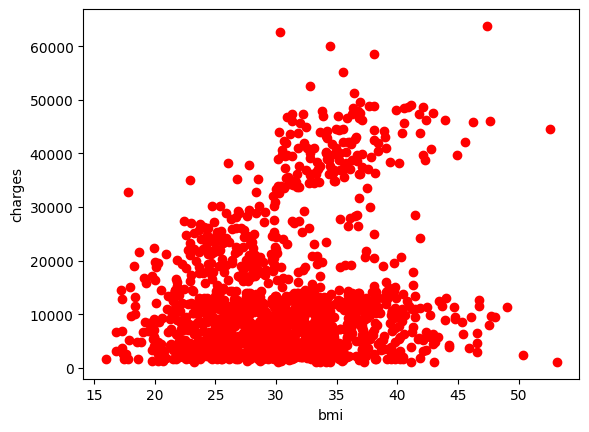

In [124]:
# create a scatter plot of the variables "bmi" and "charges" that visualize the numerical statistics
plt.scatter('bmi', 'charges', data = insurance, color='red')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()